In [24]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ef06cf94bb5144ba8d551355bb68c52b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='irmxSc3duCA0rlon-thruEjOxGtKOCSgRm4gMDFm3u5C',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ef06cf94bb5144ba8d551355bb68c52b.get_object(Bucket='visualisationassignment-donotdelete-pr-ch8g6fo6t45yfu',Key='Topic_Survey_Assignment.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_csv(body,index_col='Unnamed: 0')
df.head(6)

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


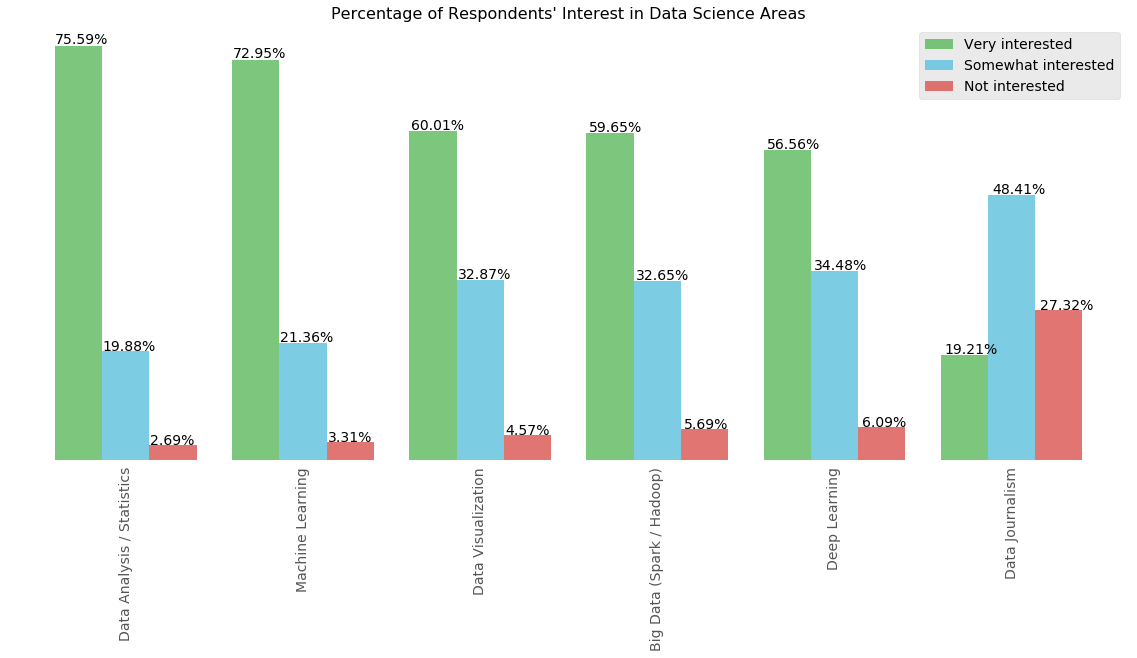

In [29]:
#Sort the dataframe in descending order of Very interested
df.sort_values(['Very interested'], ascending = False, axis = 0, inplace = True)

#converting the dataframe into percentages 
df = df.divide(2233)
df = df.multiply(100)
df = df.round(2)
df.head()

#Bar-Chart using Artist Layer

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

color_list = ['#5cb85c', '#5bc0de', '#d9534f']

ax = df.plot.bar(figsize = (20, 8), alpha = 0.8, width = 0.8, color = color_list)
ax.set_title("Percentage of Respondents' Interest in Data Science Areas", fontsize = 16)

legend = ax.legend(fontsize='14')
ax.tick_params(axis='x', labelsize=14)
ax.set_xlabel('')

#Putting the percentage values on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 14)
    
ax.set_facecolor('xkcd:white')
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

In [41]:
import pandas as pd

df_initial = pd.read_csv("https://cocl.us/sanfran_crime_dataset")
df_PdDistrict = df_initial[['PdDistrict','X']]


df_sfcrime = df_PdDistrict.groupby(['PdDistrict']).count()

df_sfcrime = df_sfcrime.reset_index()
df_sfcrime.columns = ['Neighborhood', 'Count']
df_sfcrime.head(10)

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes
!pip install folium
import folium

from IPython.display import display

sf_geo = r'san-francisco.geojson'
sf_map = folium.Map(location = [37.76, -122.45], zoom_start = 12, tiles = 'Mapbox Bright')
folium.Choropleth(
    geo_data = sf_geo, 
    data = df_sfcrime, 
    columns = ['Neighborhood', 'Count'], 
    key_on='feature.properties.DISTRICT', 
    fill_color = 'YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2, 
    legend_name='Crime Rate in San Francisco'
).add_to(sf_map)

display(sf_map)

Solving environment: / 